# Be Zen 

* Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


* Importing the dataset

In [2]:
df=pd.read_csv("file.csv")

In [3]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


# Data Exploration

* Columns

In [4]:
df.columns

Index(['uuid', 'price_string', 'price_string_unf', 'product_type', 'level_1',
       'category'],
      dtype='object')

* Null values

In [5]:
df.isna().sum()

uuid                       0
price_string         8220000
price_string_unf    13420000
product_type           10000
level_1                50000
category               10000
dtype: int64

* Statistical Information

In [6]:
df.describe()

,uuid,price_string,price_string_unf,product_type,level_1,category
count,13730000,5510000,310000,13720000,13680000,13720000
unique,1373,248,26,321,595,13
top,638744a4-b0ae-4166-8cb6-5c063c862036,$0.00,$6.75,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U3dlYXRzaGlydA,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
freq,10000,240000,30000,200000,90000,3910000


* General Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


* Shape of the Dataset

In [8]:
df.shape

(13730000, 6)

In [9]:
df.head(1)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M


# Products without prices


* Number of products withour prices

In [10]:
df.price_string.isna().sum()

8220000

* Products without prices

In [11]:
df[df.price_string.isna()].uuid

0           638744a4-b0ae-4166-8cb6-5c063c862036
1           ab313969-02cc-48b2-9daf-0054efb70b92
5           389d9f75-cc3f-4bd2-94f7-93e381a3bed5
13          1f2766ec-0a27-43f8-b28b-77a44492ead1
16          7bad39f5-74b9-4611-afb9-46fb135190cd
                            ...                 
13729992    8d763911-79b7-402d-8964-6bfe89692c66
13729993    2dc182aa-d591-49e4-85d1-5c4a60a09664
13729995    2a13338e-9268-4f7b-9e7c-b8c41c72971b
13729997    679f073a-862a-4e43-b5ce-41e45afd3bfa
13729998    25677eee-c26b-4abf-bd10-ca77a800ba26
Name: uuid, Length: 8220000, dtype: object

# Count of products without prices and with prices in each Product Type, Category, Level 1 

* Count of products without prices in Product Type

In [12]:
df[df.price_string.isna()].product_type.value_counts()

V29tZW5zIHN3aW13ZWFy                      140000
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg    130000
VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM           130000
VmVoaWNsZSBUb3lz                          120000
UGx1cyBzaXplIHdlYXI                       120000
                                           ...  
Um9sbGluZyBQaW4                            10000
V29ya291dCBMZWdnaW5ncw                     10000
TWVucyBKYWNrZXQ                            10000
U25lYWtlcnMgc2hvZXM                        10000
WW9nYSBNYXRz                               10000
Name: product_type, Length: 278, dtype: int64

* Count of products with prices in Product Type

In [13]:
df[df.price_string.notna()].product_type.value_counts()

U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM        140000
d29tZW5zIE91dGVyd2Vhcg                     130000
Q29va2luZyBVdGVuc2lscw                     110000
V29tZW5zIFBhbnRz                            90000
WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg              90000
                                            ...  
TWVjaGFuaWNhbCBQZW5jaWxz                    10000
UGV0IHBvb3AgYmFncyB3aXRoIGRpc3BlbnNlcnM     10000
UnVncw                                      10000
SnVtcHN1aXRzL092ZXJhbGw                     10000
QmFieSBTb2Fw                                10000
Name: product_type, Length: 209, dtype: int64

* Count of products without prices in Category

In [14]:
df[df.price_string.isna()].category.value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       2050000
Z3JvY2VyaWVz                           1130000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          870000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        720000
SGVhbHRo                                700000
VG95cyBhbmQgR2FtZXM                     600000
cGV0IHN1cHBsaWVz                        580000
QmFieWNhcmU                             570000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     320000
a2l0Y2hpbmcgYW5kIGRpbmluZw              250000
RWxlY3Ryb25pY3M                         210000
QXJ0IHN1cHBsaWVz                        130000
b2ZmaWNlIHByb2R1Y3Rz                     80000
Name: category, dtype: int64

* Countt of Poducts with prices in each Category

In [15]:
df[df.price_string.notna()].category.value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       1860000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        750000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          700000
Z3JvY2VyaWVz                            480000
a2l0Y2hpbmcgYW5kIGRpbmluZw              340000
SGVhbHRo                                290000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     200000
VG95cyBhbmQgR2FtZXM                     190000
QXJ0IHN1cHBsaWVz                        190000
cGV0IHN1cHBsaWVz                        160000
b2ZmaWNlIHByb2R1Y3Rz                    150000
RWxlY3Ryb25pY3M                         110000
QmFieWNhcmU                              90000
Name: category, dtype: int64

* Count of products in Level_1 without the prices

In [16]:
df[df.price_string.isna()].level_1.value_counts()

Rm9ybWFsIFN1aXRz                  60000
U3dlYXRzaGlydA                    60000
U29ja3M                           50000
Rm9ybWFsIFBhbnRz                  50000
TXVsdGl2aXRhbWluIGd1bW1pZXM       40000
                                  ...  
U29hcCBCYXI                       10000
RGlzaCBjbG90aA                    10000
UG90IHNjcnVicw                    10000
V29tZW5zIGJyaWVmcw                10000
RWNvIGZyaWVuZGx5IHlvZ2EgbWF0cw    10000
Name: level_1, Length: 476, dtype: int64

* Count of products in Level_1 with the prices

In [17]:
df[df.price_string.notna()].level_1.value_counts()

U3Bvb24sIEtuaWZlIGFuZCBGb3Jr       60000
Q2xlYW5pbmcgY2xvdGg                50000
UHVmZmVyIEphY2tldA                 50000
TWVucyBTdHJhaWdodCBGaXQgamVhbnM    50000
U2NydWJz                           40000
                                   ...  
T25lIHBpZWNlIHN3aW1zdWl0           10000
RG9nIFdpcGVz                       10000
VHJhc2ggQmFncw                     10000
TWVucyBzbmVha2Vycw                 10000
UHVwcHkgU2hhbXBvbw                 10000
Name: level_1, Length: 366, dtype: int64

# Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns. 

* Creating a copy of the Dataset

In [18]:
newdf=df.copy()

* Product price sample

In [19]:
df.price_string[10]

'$55.00'

* Cleaning the price column

In [20]:
clean_curr=re.sub("\d|[.]","",str(df.price_string[10]))
clean_curr

'$'

* Creating two new columns in the dataset for the currency and the values

In [21]:
newdf['currency']=0
newdf['currency_values']=0

In [22]:
newdf.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,currency_values
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,0
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,0
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,0,0
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,0,0
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,0


* Function to clean the price columns

In [23]:
def clean_price_func(data):
    clean_curr=re.sub("\d|[.]","",str(data))
    return clean_curr
newdf.currency=df.price_string.apply(clean_price_func)

In [24]:
newdf.currency.value_counts()

nan    8220000
$      5300000
        210000
Name: currency, dtype: int64

* Checking for the price where currency =$

In [25]:
newdf[newdf.currency== "$"].uuid.head()

2    acbd66ff-79f8-467a-91f9-108a45af5626
3    963915d6-b2e3-4098-b242-9410593cf205
6    9599f1a9-d406-43eb-89f5-9b1c0af1ac9a
7    35799087-f6f4-4ca2-abfe-cbb5c27d2f1a
8    9b3f553e-ee4c-4e1c-822e-c8c6c1b7f02a
Name: uuid, dtype: object

* Checking for the price where currency =""

In [26]:
newdf[newdf.currency== ""].uuid.head()

4      b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf
11     955f5ee8-e152-44b6-ba70-3e79bc0dd975
14     9de3aff1-4804-4c33-b4f0-f1482dccbdb3
93     c2db1477-a9d6-4127-8277-b773aca775f1
106    cba9f6bd-6352-4915-ba2e-849caf082860
Name: uuid, dtype: object

In [27]:
newdf.price_string[4]

'11.50'

* Cleaning the price for the values

In [28]:
clean_currValues=re.sub("\$","",str(df.price_string[10]))
clean_currValues

'55.00'

* Creating the function for Cleaning the values

In [29]:
def clean_price_val_func(data):
    clean_currValues=re.sub("\$","",str(data))
    return clean_currValues
newdf.currency_values=df.price_string.apply(clean_price_val_func)

* Checking the sample

In [30]:
newdf.head()

,uuid,price_string,price_string_unf,product_type,level_1,category,currency,currency_values
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,nan,nan
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,nan,nan
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,,11.50


* Dropping the price_string column

In [31]:
newdf.drop("price_string",axis=1,inplace=True)

In [32]:
newdf.columns

Index(['uuid', 'price_string_unf', 'product_type', 'level_1', 'category',
       'currency', 'currency_values'],
      dtype='object')

# Cleaning the price unf

In [33]:
newdf.price_string_unf.value_counts()

$6.75                               30000
$11.99                              20000
$49.00                              20000
$85 USD                             20000
$10.00                              10000
$198.00                             10000
$52 USD                             10000
$80 USD                             10000
$50 USD                             10000
$138.00\n\n\n\n$96.60               10000
$25.00                              10000
$29.00                              10000
$178.00\n\n\n\n$59.50               10000
$95 USD                             10000
Current price: \n$359.00            10000
$99.00                              10000
Current price: \n$329.40            10000
$178.00\n\n\n\n$64.50               10000
$248.00\n\n\n\n$104.50 - $248.00    10000
$24.00                              10000
$41 USD                             10000
$619.00                             10000
$459.99                             10000
$18.95                            

* Creating two new columns


In [34]:
newdf["currency_unf"]=0
newdf["currency_value_unf"]=0
newdf["currency_name_unf"]=0

* Cleaning the currency_unf

In [35]:
def clean_price_func(data):
    clean_curr_unf=re.sub("\d|[.]|\n|\w|\:|\s|.*$","",str(data))
    return clean_curr_unf
newdf.currency_unf=df.price_string_unf.apply(clean_price_func)

In [36]:
clean_curr_unf=re.sub("\d|[.]|\n|\w|\:|\s|.*$","",str('$178.00\n\n\n\n$59.50 '))
clean_curr_unf

'$'

In [37]:
newdf.currency_unf.value_counts()

     13690000
$       40000
Name: currency_unf, dtype: int64

* Cleaning for currency_value_unf

In [75]:
clean_currValues=re.sub("\$|.*\n|[A-Z]|\s|.*-","",str("104.50-248.00 "))
clean_currValues

'248.00'

In [76]:
def clean_price_val_unf_func(data):
    clean_currValues=re.sub("\$|.*\n|[A-Z]|\s|.*-","",str(data))
    return clean_currValues
newdf.currency_value_unf=df.price_string_unf.apply(clean_price_val_unf_func)

In [77]:
newdf.currency_value_unf.value_counts()

nan       13420000
6.75         30000
49.00        20000
85           20000
11.99        20000
10.00        10000
198.00       10000
52           10000
80           10000
50           10000
96.60        10000
25.00        10000
29.00        10000
59.50        10000
95           10000
99.00        10000
359.00       10000
329.40       10000
64.50        10000
248.00       10000
24.00        10000
41           10000
619.00       10000
459.99       10000
18.95        10000
15.00        10000
30.00        10000
Name: currency_value_unf, dtype: int64

* Cleaning for currency names unf

In [41]:
clean_currNames=re.sub("^\w{7}\s\w{5}.|.*\d|\s|","",str('Current price: \n$329.40'))
clean_currNames

''

In [42]:
def clean_price_name_unf_func(data):
    clean_currValues=re.sub("^\w{7}\s\w{5}.|.*\d|\s|","",str(data))
    return clean_currValues
newdf.currency_name_unf=df.price_string_unf.apply(clean_price_name_unf_func)

In [43]:
newdf.currency_name_unf.value_counts()

nan    13420000
         240000
USD       70000
Name: currency_name_unf, dtype: int64

* Exploratory Data Analysis

In [44]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 10 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   uuid                object
 1   price_string_unf    object
 2   product_type        object
 3   level_1             object
 4   category            object
 5   currency            object
 6   currency_values     object
 7   currency_unf        object
 8   currency_value_unf  object
 9   currency_name_unf   object
dtypes: object(10)
memory usage: 1.0+ GB


* Handling the NaN values

* Replacing all the nan values with 0

In [78]:
newdf.replace('nan',0,inplace=True)

In currency_values column

In [46]:
newdf[newdf.currency_values=='nan'].currency_values

Series([], Name: currency_values, dtype: object)

* Converting the currency_values & currency_value_unf datatypes to float

In [47]:
newdf.currency_values=pd.to_numeric(newdf.currency_values, downcast='float',errors='ignore')

In [48]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   uuid                object 
 1   price_string_unf    object 
 2   product_type        object 
 3   level_1             object 
 4   category            object 
 5   currency            object 
 6   currency_values     float32
 7   currency_unf        object 
 8   currency_value_unf  object 
 9   currency_name_unf   object 
dtypes: float32(1), object(9)
memory usage: 995.1+ MB


* Converting the nan values in the currency values unf col

In [79]:
newdf[newdf.currency_value_unf=='nan'].currency_value_unf

Series([], Name: currency_value_unf, dtype: object)

* Changing the datatype of the currency value unf column

In [80]:
newdf.currency_value_unf=pd.to_numeric(newdf.currency_value_unf, downcast='float',errors='ignore')

In [73]:
# newdf.currency_value_unf=pd.to_numeric(newdf.currency_value_unf)

ValueError: Unable to parse string "104.50-248.00" at position 321

In [81]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   uuid                object 
 1   price_string_unf    object 
 2   product_type        object 
 3   level_1             object 
 4   category            object 
 5   currency            object 
 6   currency_values     float32
 7   currency_unf        object 
 8   currency_value_unf  float32
 9   currency_name_unf   object 
dtypes: float32(2), object(8)
memory usage: 942.8+ MB


# List out the categories with average price of product

* Average price of the product

In [52]:
# curr_avg=np.mean(newdf.currency_values)
# curr_avg

In [82]:
newdf.head()

,uuid,price_string_unf,product_type,level_1,category,currency,currency_values,currency_unf,currency_value_unf,currency_name_unf
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,0,0.000000,,0.0,0
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,0,0.000000,,0.0,0
2,acbd66ff-79f8-467a-91f9-108a45af5626,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$,19.950001,,0.0,0
3,963915d6-b2e3-4098-b242-9410593cf205,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$,92.000000,,0.0,0
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,,11.500000,,0.0,0


* Category wise product price split


In [83]:
newdf.category.value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       3910000
Z3JvY2VyaWVz                           1610000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw         1570000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl       1470000
SGVhbHRo                                990000
VG95cyBhbmQgR2FtZXM                     790000
cGV0IHN1cHBsaWVz                        740000
QmFieWNhcmU                             660000
a2l0Y2hpbmcgYW5kIGRpbmluZw              590000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     520000
RWxlY3Ryb25pY3M                         320000
QXJ0IHN1cHBsaWVz                        320000
b2ZmaWNlIHByb2R1Y3Rz                    230000
Name: category, dtype: int64

* Crating the list of the categories

In [84]:
cat=newdf.category.value_counts().index.tolist()

In [85]:
cat

['Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz',
 'Z3JvY2VyaWVz',
 'SG91c2Vob2xkIGFuZCBDbGVhbmluZw',
 'YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl',
 'SGVhbHRo',
 'VG95cyBhbmQgR2FtZXM',
 'cGV0IHN1cHBsaWVz',
 'QmFieWNhcmU',
 'a2l0Y2hpbmcgYW5kIGRpbmluZw',
 'VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ',
 'RWxlY3Ryb25pY3M',
 'QXJ0IHN1cHBsaWVz',
 'b2ZmaWNlIHByb2R1Y3Rz']

In [57]:
cat[1]

'Z3JvY2VyaWVz'

* Getting the mean of the individual categories


In [86]:
x=newdf[newdf.category==cat[1]].currency_values.mean()


In [88]:
avg=[]
for i in cat:
    avg.append(newdf[newdf.category==i].currency_values.mean())

In [89]:
avg

[59.659805,
 3.1428566,
 33.974083,
 17.72707,
 9.537073,
 7.804177,
 3.0663524,
 22.321213,
 9.625591,
 31.624422,
 20.71375,
 11.560938,
 13.35652]

In [90]:
len(avg)

13

In [91]:
len(cat)

13

* Zipping the two lists into the dictionary

In [63]:
cat_avg = {cat[i]: avg[i] for i in range(len(avg))}

In [92]:
cat_avg

{'Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz': 59.659805,
 'Z3JvY2VyaWVz': 3.1428566,
 'SG91c2Vob2xkIGFuZCBDbGVhbmluZw': 33.974083,
 'YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl': 17.72707,
 'SGVhbHRo': 9.537073,
 'VG95cyBhbmQgR2FtZXM': 7.804177,
 'cGV0IHN1cHBsaWVz': 3.0663524,
 'QmFieWNhcmU': 22.321213,
 'a2l0Y2hpbmcgYW5kIGRpbmluZw': 9.625591,
 'VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ': 31.624422,
 'RWxlY3Ryb25pY3M': 20.71375,
 'QXJ0IHN1cHBsaWVz': 11.560938,
 'b2ZmaWNlIHByb2R1Y3Rz': 13.35652}

# Data Visualization

In [93]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   uuid                object 
 1   price_string_unf    object 
 2   product_type        object 
 3   level_1             object 
 4   category            object 
 5   currency            object 
 6   currency_values     float32
 7   currency_unf        object 
 8   currency_value_unf  float32
 9   currency_name_unf   object 
dtypes: float32(2), object(8)
memory usage: 942.8+ MB


* Pairplot

<Figure size 720x1080 with 0 Axes>

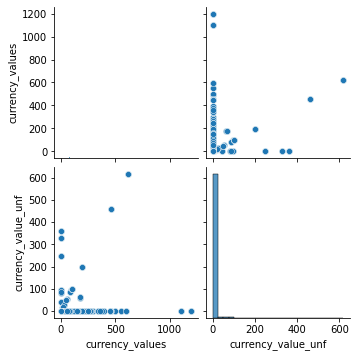

In [94]:
plt.figure(figsize=(10,15))
sns.pairplot(newdf)

* Correlations

In [95]:
newdf.corr()

,currency_values,currency_value_unf
currency_values,1.000000,0.211782
currency_value_unf,0.211782,1.000000


* Heatmap of the correlations

<AxesSubplot:>

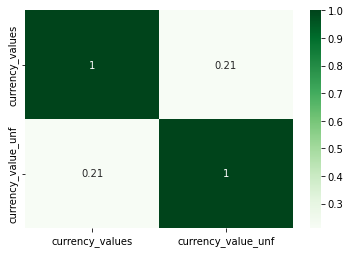

In [96]:
sns.heatmap(newdf.corr(),annot=True, cmap='Greens')

* Boxplot

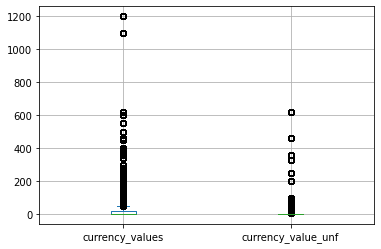

In [98]:
newdf.plot.box()
plt.grid()